<a href="https://colab.research.google.com/github/ggg073/ijssalon/blob/main/Handelsbot_A2_de_Goede.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Data Verzameling en voorbereiding**

## Instal pips

In [1]:
!pip install pandas-ta
!pip install arch
!pip install scikeras
!pip install hmmlearn








     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=097b22353676a81608dc26d91b3d2885dc488beccb54509c72d793c24b8f515b
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 982.9/982.9 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 3.3 MB/s eta 0:00:00


In [29]:
!pip install gym stable-baselines3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 18.9 MB/s eta 0:00:00


## 1.1. Prijs data verzamelen

In [2]:
import pandas as pd

# Gebruik sep='\t' om aan te geven dat de kolommen gescheiden zijn door tabs
data = pd.read_csv('/content/drive/MyDrive/XAUUSD_H1_202309280100_202409272300.csv', sep='\t')

# Bekijk de eerste paar rijen om te controleren of het correct is ingelezen
data.head()


,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,2023.09.28,01:00:00,1876.10,1877.18,1875.81,1876.95,1304,0,11
1,2023.09.28,02:00:00,1876.97,1877.73,1876.19,1877.63,1353,0,5
2,2023.09.28,03:00:00,1877.63,1877.88,1876.08,1877.05,2200,0,5
3,2023.09.28,04:00:00,1877.00,1877.42,1873.51,1874.10,4286,0,5
4,2023.09.28,05:00:00,1874.10,1875.27,1873.85,1874.78,2183,0,5


## 1.2. Data schoonmaken en Normaliseren

In [3]:
# Combineer de DATE en TIME kolommen tot één datetime kolom
data['DATETIME'] = pd.to_datetime(data['<DATE>'] + ' ' + data['<TIME>'])

# Verwijder de aparte DATE en TIME kolommen
data = data.drop(['<DATE>', '<TIME>'], axis=1)

# Bekijk de eerste paar rijen om te controleren of de conversie correct is
data.head()


,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>,DATETIME
0,1876.10,1877.18,1875.81,1876.95,1304,0,11,2023-09-28 01:00:00
1,1876.97,1877.73,1876.19,1877.63,1353,0,5,2023-09-28 02:00:00
2,1877.63,1877.88,1876.08,1877.05,2200,0,5,2023-09-28 03:00:00
3,1877.00,1877.42,1873.51,1874.10,4286,0,5,2023-09-28 04:00:00
4,1874.10,1875.27,1873.85,1874.78,2183,0,5,2023-09-28 05:00:00


In [4]:
# Zet de DATETIME kolom als index
data.set_index('DATETIME', inplace=True)

# Controleer of de index correct is ingesteld
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5939 entries, 2023-09-28 01:00:00 to 2024-09-27 23:00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   <OPEN>     5939 non-null   float64
 1   <HIGH>     5939 non-null   float64
 2   <LOW>      5939 non-null   float64
 3   <CLOSE>    5939 non-null   float64
 4   <TICKVOL>  5939 non-null   int64  
 5   <VOL>      5939 non-null   int64  
 6   <SPREAD>   5939 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 371.2 KB


In [5]:
# Controleer of er ontbrekende waarden zijn
print(data.isnull().sum())

# Basisinformatie over de dataset
data.info()

# Verwijder ontbrekende waarden, indien nodig
data = data.dropna()

# Bekijk het aangepaste data na opschoning
data.head()


<OPEN>       0
<HIGH>       0
<LOW>        0
<CLOSE>      0
<TICKVOL>    0
<VOL>        0
<SPREAD>     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5939 entries, 2023-09-28 01:00:00 to 2024-09-27 23:00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   <OPEN>     5939 non-null   float64
 1   <HIGH>     5939 non-null   float64
 2   <LOW>      5939 non-null   float64
 3   <CLOSE>    5939 non-null   float64
 4   <TICKVOL>  5939 non-null   int64  
 5   <VOL>      5939 non-null   int64  
 6   <SPREAD>   5939 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 371.2 KB


,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
DATETIME,,,,,,,
2023-09-28 01:00:00,1876.10,1877.18,1875.81,1876.95,1304,0,11
2023-09-28 02:00:00,1876.97,1877.73,1876.19,1877.63,1353,0,5
2023-09-28 03:00:00,1877.63,1877.88,1876.08,1877.05,2200,0,5
2023-09-28 04:00:00,1877.00,1877.42,1873.51,1874.10,4286,0,5
2023-09-28 05:00:00,1874.10,1875.27,1873.85,1874.78,2183,0,5


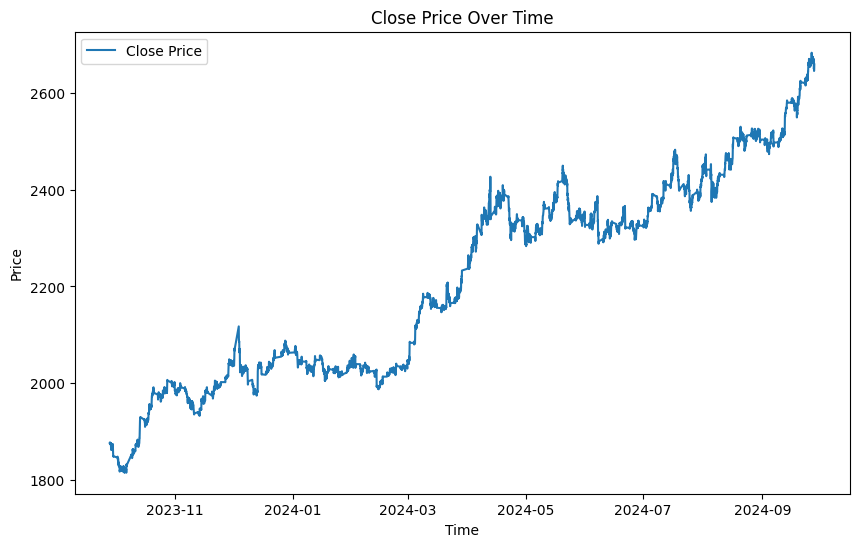

In [6]:
import matplotlib.pyplot as plt

# Plot de slotkoers door de tijd
plt.figure(figsize=(10,6))
plt.plot(data.index, data['<CLOSE>'], label='Close Price')
plt.title('Close Price Over Time')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


## 1.3. Technische indicatoren berekenen

In [7]:
import pandas_ta as ta

# Bereken het voortschrijdend gemiddelde (Moving Average)
data['MA20'] = ta.sma(data['<CLOSE>'], length=20)

# Bereken de Relative Strength Index (RSI)
data['RSI'] = ta.rsi(data['<CLOSE>'], length=14)

# Bereken de MACD (Moving Average Convergence Divergence)
macd = ta.macd(data['<CLOSE>'])
data['MACD'] = macd['MACD_12_26_9']
data['MACD_signal'] = macd['MACDs_12_26_9']
data['MACD_hist'] = macd['MACDh_12_26_9']

# Stap 2: Verwijder rijen met NaN-waarden
data.dropna(inplace=True)

# Stap 3: Controleer de data na het verwijderen van NaN-waarden
print(data.head())

# Optioneel: Controleer of er nog NaN-waarden zijn
print(data.isnull().sum())

# Bekijk de eerste paar rijen met de nieuwe kolommen
data.head()


                      <OPEN>   <HIGH>    <LOW>  <CLOSE>  <TICKVOL>  <VOL>  \
DATETIME                                                                    
2023-09-29 11:00:00  1873.53  1873.75  1871.32  1871.59       4471      0   
2023-09-29 12:00:00  1871.60  1873.65  1870.95  1873.56       3913      0   
2023-09-29 13:00:00  1873.56  1873.57  1872.29  1872.30       2433      0   
2023-09-29 14:00:00  1872.29  1872.29  1867.53  1869.46       4646      0   
2023-09-29 15:00:00  1869.48  1874.02  1868.00  1873.83       9243      0   

                     <SPREAD>       MA20        RSI      MACD  MACD_signal  \
DATETIME                                                                     
2023-09-29 11:00:00         5  1866.8075  55.201852 -1.531141    -3.270610   
2023-09-29 12:00:00         5  1866.8655  58.764803 -1.000764    -2.816641   
2023-09-29 13:00:00         5  1866.8300  55.712741 -0.674334    -2.388179   
2023-09-29 14:00:00         5  1867.0385  49.475421 -0.637452    -2.03

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>,MA20,RSI,MACD,MACD_signal,MACD_hist
DATETIME,,,,,,,,,,,,
2023-09-29 11:00:00,1873.53,1873.75,1871.32,1871.59,4471,0,5,1866.8075,55.201852,-1.531141,-3.270610,1.739469
2023-09-29 12:00:00,1871.60,1873.65,1870.95,1873.56,3913,0,5,1866.8655,58.764803,-1.000764,-2.816641,1.815877
2023-09-29 13:00:00,1873.56,1873.57,1872.29,1872.30,2433,0,5,1866.8300,55.712741,-0.674334,-2.388179,1.713846
2023-09-29 14:00:00,1872.29,1872.29,1867.53,1869.46,4646,0,5,1867.0385,49.475421,-0.637452,-2.038034,1.400582
2023-09-29 15:00:00,1869.48,1874.02,1868.00,1873.83,9243,0,5,1867.4940,57.381934,-0.252687,-1.680964,1.428277


In [8]:
# Controleer of de MACD kolommen correct zijn toegevoegd
print(data[['MACD', 'MACD_signal', 'MACD_hist']].head())


                         MACD  MACD_signal  MACD_hist
DATETIME                                             
2023-09-29 11:00:00 -1.531141    -3.270610   1.739469
2023-09-29 12:00:00 -1.000764    -2.816641   1.815877
2023-09-29 13:00:00 -0.674334    -2.388179   1.713846
2023-09-29 14:00:00 -0.637452    -2.038034   1.400582
2023-09-29 15:00:00 -0.252687    -1.680964   1.428277


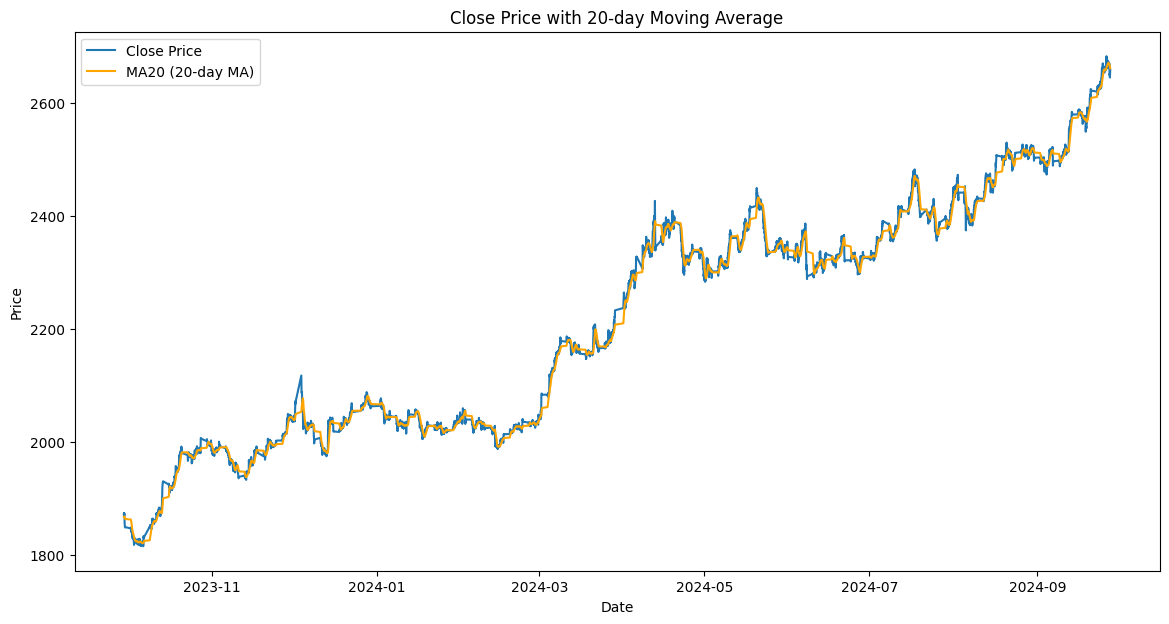

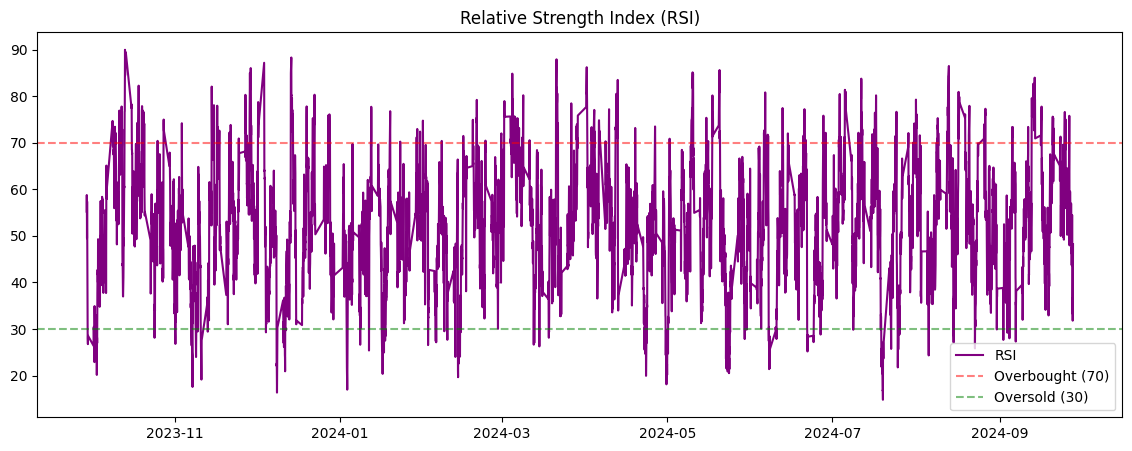

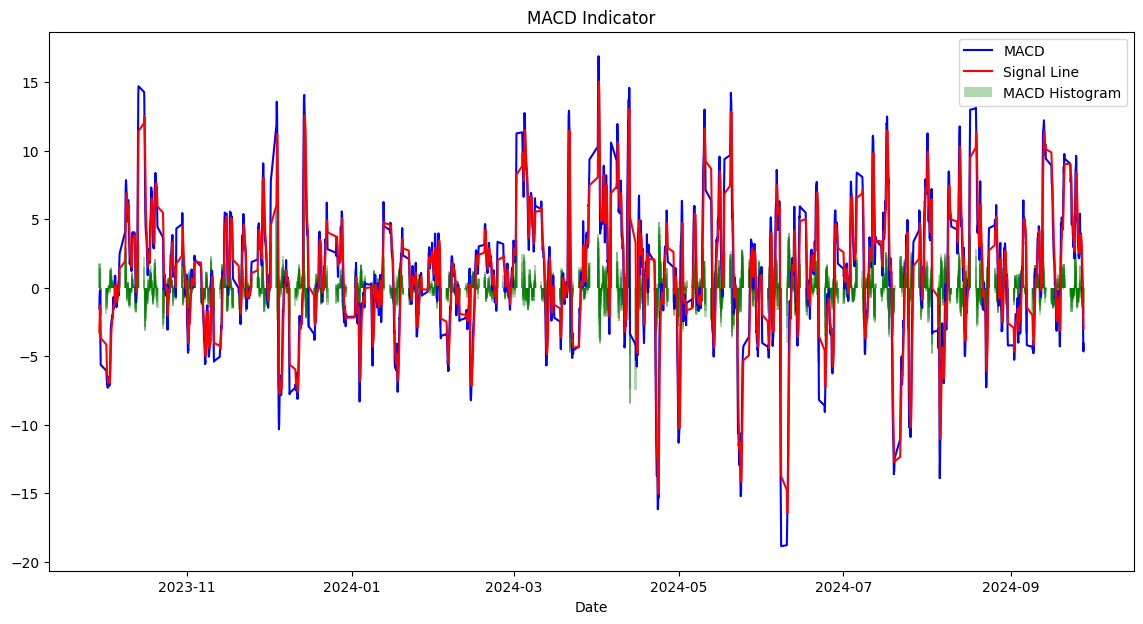

In [9]:
import matplotlib.pyplot as plt

# Sluitprijs (Close Price) met de 20-daagse Moving Average
plt.figure(figsize=(14,7))
plt.plot(data.index, data['<CLOSE>'], label='Close Price')
plt.plot(data.index, data['MA20'], label='MA20 (20-day MA)', color='orange')
plt.title('Close Price with 20-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# RSI visualisatie
plt.figure(figsize=(14,5))
plt.plot(data.index, data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', alpha=0.5, color='green', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()

# MACD visualisatie
plt.figure(figsize=(14,7))
plt.plot(data.index, data['MACD'], label='MACD', color='blue')
plt.plot(data.index, data['MACD_signal'], label='Signal Line', color='red')
plt.bar(data.index, data['MACD_hist'], label='MACD Histogram', color='green', alpha=0.3)
plt.title('MACD Indicator')
plt.xlabel('Date')
plt.legend()
plt.show()


## 1.4. Feature engineering en data augmentatie

In [10]:
# Stap 1: Inladen van de data en berekenen van de technische indicatoren (al gedaan)

# Stap 2: Visualisaties van de basisgegevens en technische indicatoren (al gedaan)

# Stap 3: Voeg nieuwe features toe (feature engineering)
import numpy as np

# Prijsverschil (High-Low Spread)
data['High_Low_Spread'] = data['<HIGH>'] - data['<LOW>']

# Dagelijkse prijsverandering
data['Price_Change_pct'] = data['<CLOSE>'].pct_change() * 100

# Voortschrijdende volatiliteit
data['Volatility'] = data['<CLOSE>'].rolling(window=10).std()

# Volume-analyse
data['Volume_Change'] = data['<TICKVOL>'].diff()
data['Volume_MA10'] = data['<TICKVOL>'].rolling(window=10).mean()

# Lagged features
data['Close_Lag1'] = data['<CLOSE>'].shift(1)
data['Close_Lag2'] = data['<CLOSE>'].shift(2)

# Synthetische data toevoegen
data['Close_Synthetic'] = data['<CLOSE>'] + np.random.normal(0, 0.01, len(data))

# Verwijder eventuele NaN-waarden
data.dropna(inplace=True)

# Controleer de dataset met de nieuwe features
print(data.head())

# Opslaan van de nieuwe dataset, klaar voor modelinvoer
data.to_csv('verrijkte_dataset.csv', index=True)


                      <OPEN>   <HIGH>    <LOW>  <CLOSE>  <TICKVOL>  <VOL>  \
DATETIME                                                                    
2023-09-29 20:00:00  1853.67  1853.67  1849.68  1849.95       4483      0   
2023-09-29 21:00:00  1849.94  1850.90  1846.28  1848.87       3711      0   
2023-09-29 22:00:00  1848.84  1850.27  1847.96  1848.24       4446      0   
2023-09-29 23:00:00  1848.23  1849.85  1847.67  1849.08       1691      0   
2023-10-02 01:00:00  1847.01  1848.65  1845.66  1846.44       1965      0   

                     <SPREAD>       MA20        RSI      MACD  MACD_signal  \
DATETIME                                                                     
2023-09-29 20:00:00         5  1865.8245  28.037442 -3.856661    -2.159094   
2023-09-29 21:00:00         5  1865.0525  27.234624 -4.649799    -2.657235   
2023-09-29 22:00:00         5  1864.1310  26.753386 -5.268470    -3.179482   
2023-09-29 23:00:00         7  1863.3175  28.565841 -5.626136    -3.66

# **2. Modelontwikkeling voor Prijsvoorspelling**

## 2.1. Data voorbereiden voor modelinvoer

In [11]:
from sklearn.model_selection import train_test_split

# Bepaal de features (X) en het doel (y), in dit geval de sluitprijs als target
features = ['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', 'MA20', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist',
            'High_Low_Spread', 'Price_Change_pct', 'Volatility', 'Volume_Change', 'Volume_MA10',
            'Close_Lag1', 'Close_Lag2', 'Close_Synthetic']

# X: alle features, y: sluitprijs (target)
X = data[features]
y = data['<CLOSE>']  # De sluitprijs die we willen voorspellen

# Splitsen van de data: 70% training, 15% validatie, 15% testen
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)  # Houdt de volgorde
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# Controleer de afmetingen van de gesplitste data
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (4127, 17) (4127,)
Validation set: (885, 17) (885,)
Test set: (885, 17) (885,)


In [12]:
import numpy as np

# Functie om tijdvensters te maken van de dataset
def create_time_windows(X, y, window_size):
    X_windows = []
    y_windows = []
    for i in range(len(X) - window_size):
        X_windows.append(X[i:i+window_size])
        y_windows.append(y[i+window_size])
    return np.array(X_windows), np.array(y_windows)

# Kies een venstergrootte, bijvoorbeeld 60 tijdstappen Deze is dus aanpasbaar!!
window_size = 60

# Maak tijdvensters voor de training-, validatie-, en testsets
X_train_windows, y_train_windows = create_time_windows(X_train.values, y_train.values, window_size)
X_val_windows, y_val_windows = create_time_windows(X_val.values, y_val.values, window_size)
X_test_windows, y_test_windows = create_time_windows(X_test.values, y_test.values, window_size)

# Controleer de afmetingen van de vensters
print("X_train_windows shape:", X_train_windows.shape)
print("y_train_windows shape:", y_train_windows.shape)




X_train_windows shape: (4067, 60, 17)
y_train_windows shape: (4067,)


## 2.2. LSTM/CNN hybride model ontwikkelen, trainen, testen en opslaan

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Bouw het CNN-LSTM hybride model
def build_cnn_lstm_model(input_shape):
    model = Sequential()

    # Voeg hier de Input-laag toe in plaats van input_shape in de Conv1D-laag
    model.add(Input(shape=(input_shape[0], input_shape[1])))

    # CNN-lagen
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))  # input_shape is al gespecificeerd via de Input-laag
    model.add(MaxPooling1D(pool_size=2))

    # LSTM-lagen
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))

    # Dense lagen
    model.add(Dense(units=25, activation='relu'))
    model.add(Dense(units=1))  # Uitvoeren van een voorspelling (regressietaak)

    # Model compileren
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    return model

# Model bouwen
input_shape = (X_train_windows.shape[1], X_train_windows.shape[2])  # (60, 17) = (tijdstappen, features)
model = build_cnn_lstm_model(input_shape)

# Model samenvatting
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 58, 64)              │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 29, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 29, 50)              │          23,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 29, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,829 (186.83 KB)

 Trainable params: 47,829 (186.83 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Early stopping en model checkpointing met .keras extensie
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

# Model trainen
history = model.fit(X_train_windows, y_train_windows,
                    validation_data=(X_val_windows, y_val_windows),
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping, model_checkpoint])

print("Model getraind en opgeslagen als 'best_model.keras'")


Epoch 1/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 4488076.0000 - val_loss: 5452084.5000
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 4239328.0000 - val_loss: 4985941.0000
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 3782695.5000 - val_loss: 4302919.0000
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 3155399.5000 - val_loss: 3494523.5000
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 2430206.7500 - val_loss: 2660651.5000
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 1738091.5000 - val_loss: 1893659.7500
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 1143033.5000 - val_loss: 1260861.3750
Epoch 8/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 684757.5625 - val_loss: 790596.7500
Epoch 9/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 370252.4688 - val_loss: 477569.4375
Epoch 10/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 189524.5781 - val_loss: 287506.1875
Epoch 11/50
12

In [15]:
# Model evalueren op de testset
test_loss = model.evaluate(X_test_windows, y_test_windows)
print(f'Test Loss: {test_loss}')

# Laad het beste model vanuit het .keras bestand
model.load_weights('best_model.keras')


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 140029.8125
Test Loss: 174998.09375


## 2.3. Model trainen en evalueren

In [16]:
import numpy as np

# Gemiddelde nemen over de tijdstappen om de 3D-array te reduceren naar 2D
X_train_2d = np.mean(X_train_windows, axis=1)
X_test_2d = np.mean(X_test_windows, axis=1)

# Controleer de nieuwe vorm van de data
print(X_train_2d.shape)  # Dit moet nu (4067, 17) zijn, compatibel met LinearRegression
print(X_test_2d.shape)  # Dit moet ook (aantal test samples, 17) zijn


(4067, 17)
(825, 17)


In [17]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Cross-validatie instellen
kf = KFold(n_splits=5)

mse_scores = []

# Cross-validatie uitvoeren
for train_index, val_index in kf.split(X_train_windows):
    X_train_fold, X_val_fold = X_train_windows[train_index], X_train_windows[val_index]
    y_train_fold, y_val_fold = y_train_windows[train_index], y_train_windows[val_index]

    # Model opnieuw trainen per fold
    model = build_cnn_lstm_model(input_shape)
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)

    # Voorspellingen doen en MSE berekenen
    predictions = model.predict(X_val_fold)
    mse = mean_squared_error(y_val_fold, predictions)
    mse_scores.append(mse)

# Gemiddelde MSE over de folds
mean_mse = np.mean(mse_scores)
print(f'Gemiddelde MSE over cross-validatie: {mean_mse}')


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Gemiddelde MSE over cross-validatie: 552572.2123375626


In [19]:
# Train het LSTM-model apart met 3D-data
model.fit(X_train_windows, y_train_windows)

# Voorspellingen maken met het LSTM-model op de testdata
lstm_predictions = model.predict(X_test_windows)

# Controleer de vorm van de voorspellingen
print(lstm_predictions.shape)  # Zorg dat de voorspellingen de juiste vorm hebben (aantal samples, 1)


128/128 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 770013.3125
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
(825, 1)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Train de niet-LSTM modellen (LinearRegression en DecisionTree) met 2D-data
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor()

# Train deze modellen met de 2D-data
lr_model.fit(X_train_2d, y_train_windows)
dt_model.fit(X_train_2d, y_train_windows)

# Voorspellingen maken met de 2D-modellen op de testdata
lr_predictions = lr_model.predict(X_test_2d)
dt_predictions = dt_model.predict(X_test_2d)

# Controleer de vormen van de voorspellingen
print(lr_predictions.shape)
print(dt_predictions.shape)


(825,)
(825,)


In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Zorg ervoor dat combined_predictions de juiste vorm heeft
combined_predictions = np.mean(combined_predictions, axis=1)

# Controleer de nieuwe vorm
print(combined_predictions.shape)

# MSE berekenen voor het gecombineerde model
mse_combined = mean_squared_error(y_test_windows, combined_predictions)
print(f'MSE van het gecombineerde model: {mse_combined}')


(825,)
MSE van het gecombineerde model: 175926.75271895443


# 3. GARCH volatiliteitsvoorspelling voor Risicomanagement

## 3.1. Data voorbereiden voor GARCH Model

In [24]:
import pandas as pd
import numpy as np
from arch import arch_model


In [25]:
# Procentuele prijsverandering berekenen (returns)
data['Returns'] = data['<CLOSE>'].pct_change().dropna()

# Controleer of de returns goed zijn berekend
print(data['Returns'].head())



DATETIME
2023-09-29 20:00:00         NaN
2023-09-29 21:00:00   -0.000584
2023-09-29 22:00:00   -0.000341
2023-09-29 23:00:00    0.000454
2023-10-02 01:00:00   -0.001428
Name: Returns, dtype: float64


## 3.2. GARCH Model ontwikkelen en Trainen

In [26]:
# Schaal de returns om de waarschuwing over de schaal van y op te lossen
# Vermenigvuldig de returns met 1000
data['Scaled_Returns'] = data['Returns'] * 1000

# Parameters voor de zoekruimte van p en q
p_values = range(1, 5)  # Test p-waarden van 1 tot 4
q_values = range(1, 5)  # Test q-waarden van 1 tot 4

best_aic = float("inf")  # Zeer hoog startpunt voor AIC
best_pq = None
best_model = None

# Zoek naar het beste model
for p in p_values:
    for q in q_values:
        try:
            # GARCH model initialiseren
            model = arch_model(data['Scaled_Returns'].dropna(), vol='Garch', p=p, q=q)

            # Model trainen
            model_fitted = model.fit(disp="off")

            # AIC controleren
            if model_fitted.aic < best_aic:
                best_aic = model_fitted.aic
                best_pq = (p, q)
                best_model = model_fitted
        except Exception as e:
            print(f"Error voor p={p}, q={q}: {e}")
            continue

# Resultaten weergeven
print(f"Beste model gevonden met p={best_pq[0]} en q={best_pq[1]} met AIC={best_aic}")
print(best_model.summary())

# Toewijzen van het beste model aan garch_fitted voor verder gebruik
garch_fitted = best_model

# Controleer of de rescaling werkt door de laatste volatiliteitsvoorspellingen te bekijken
garch_forecast = best_model.forecast(horizon=10)
print(garch_forecast.variance[-1:])


Beste model gevonden met p=3 en q=4 met AIC=23043.933065515885
                     Constant Mean - GARCH Model Results                      
Dep. Variable:         Scaled_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -11513.0
Distribution:                  Normal   AIC:                           23043.9
Method:            Maximum Likelihood   BIC:                           23104.1
                                        No. Observations:                 5896
Date:                Tue, Oct 01 2024   Df Residuals:                     5895
Time:                        14:50:58   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
m

## 3.3. Volatiliteitsvoorspelling Genereren

In [27]:
# Voorspellingen maken (bijv. voor 10 tijdstappen vooruit)
garch_forecast = garch_fitted.forecast(horizon=10)

# Geannualiseerde volatiliteit
print(garch_forecast.variance[-1:])


                         h.01      h.02      h.03      h.04      h.05  \
DATETIME                                                                
2024-09-27 23:00:00  4.064478  3.902864  4.088337  3.749254  3.791792   

                         h.06      h.07      h.08      h.09     h.10  
DATETIME                                                              
2024-09-27 23:00:00  3.752781  3.767867  3.701985  3.691957  3.67687  


## 3.4. Regime Switching Modellen

In [28]:
import numpy as np
from hmmlearn.hmm import GaussianHMM

# Veronderstel dat je returns reeds zijn geschaald (data['Scaled_Returns'])
returns = data['Scaled_Returns'].dropna()

# 1. Hidden Markov Model (HMM) toepassen om regimes te identificeren

# Maak de data geschikt voor HMM door deze in een 2D-array te zetten
X = np.column_stack([returns])

# Train het HMM-model met twee regimes (bijv. bull & bear markten)
hmm_model = GaussianHMM(n_components=2, covariance_type="full", n_iter=100)
hmm_model.fit(X)

# 2. Regimes voorspellen
hidden_states = hmm_model.predict(X)

# Voeg een NaN toe aan het begin van hidden_states zodat de lengte gelijk is aan data['Scaled_Returns']
full_hidden_states = np.append([np.nan], hidden_states)

# Voeg de regimes toe aan je dataset voor analyse
data['Regime'] = full_hidden_states

# 3. Voor elk regime afzonderlijk een GARCH-model toepassen

# Selecteer de gegevens per regime
bull_market = data[data['Regime'] == 0]
bear_market = data[data['Regime'] == 1]

# Train afzonderlijke GARCH-modellen voor elk regime
from arch import arch_model

# Bull market GARCH-model
bull_model = arch_model(bull_market['Scaled_Returns'], vol='Garch', p=1, q=1)
bull_fitted = bull_model.fit(disp="off")

# Bear market GARCH-model
bear_model = arch_model(bear_market['Scaled_Returns'], vol='Garch', p=1, q=1)
bear_fitted = bear_model.fit(disp="off")

# 4. Vooruitzichten voor beide regimes voorspellen
bull_forecast = bull_fitted.forecast(horizon=10)
bear_forecast = bear_fitted.forecast(horizon=10)

# Resultaten tonen
print("Bull market GARCH voorspellingen (volatiliteit):")
print(bull_forecast.variance[-1:])

print("Bear market GARCH voorspellingen (volatiliteit):")
print(bear_forecast.variance[-1:])


Bull market GARCH voorspellingen (volatiliteit):
                         h.01      h.02      h.03      h.04     h.05  \
DATETIME                                                               
2024-09-27 16:00:00  1.025769  1.005916  0.990413  0.978305  0.96885   

                         h.06    h.07      h.08     h.09      h.10  
DATETIME                                                            
2024-09-27 16:00:00  0.961466  0.9557  0.951197  0.94768  0.944934  
Bear market GARCH voorspellingen (volatiliteit):
                          h.01       h.02       h.03       h.04       h.05  \
DATETIME                                                                     
2024-09-27 23:00:00  12.541831  13.071462  13.250471  13.310974  13.331423   

                          h.06      h.07      h.08       h.09       h.10  
DATETIME                                                                  
2024-09-27 23:00:00  13.338334  13.34067  13.34146  13.341727  13.341817  


# 4.

# **Integratie en Implementatie**

## 5.1. Modellen integreren in Handelsplatform

## 5.2. Orders versturen en monitoren